In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

a = np.array([1,1])
X_new = np.vstack((X, a))
Y_new = [-1] * 20 + [1] * 20 + [-1]

a = np.array([2,2])
X_new2 = np.vstack((X, a))
Y_new2 = [-1] * 20 + [1] * 20 + [-1]

Text(0.5, 1.0, 'Linear Not Separable 2')

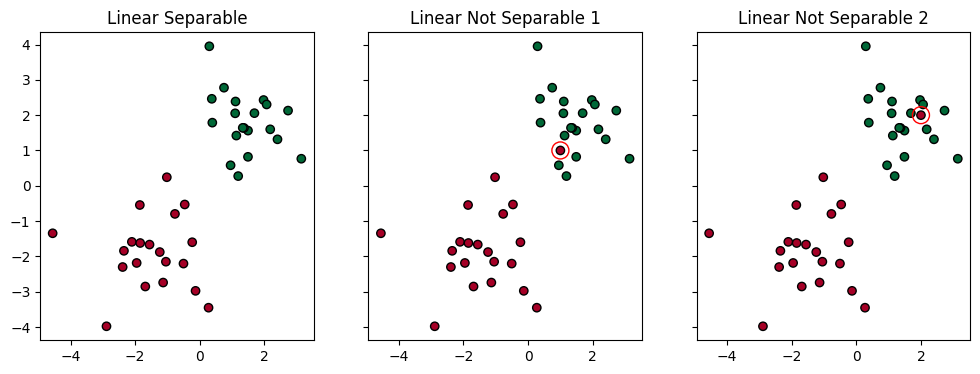

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),sharey=True)

ax1.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax1.set_title('Linear Separable')

ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax2.scatter(1, 1, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax2.set_title('Linear Not Separable 1')

ax3.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new2, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax3.scatter(2, 2, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax3.set_title('Linear Not Separable 2')

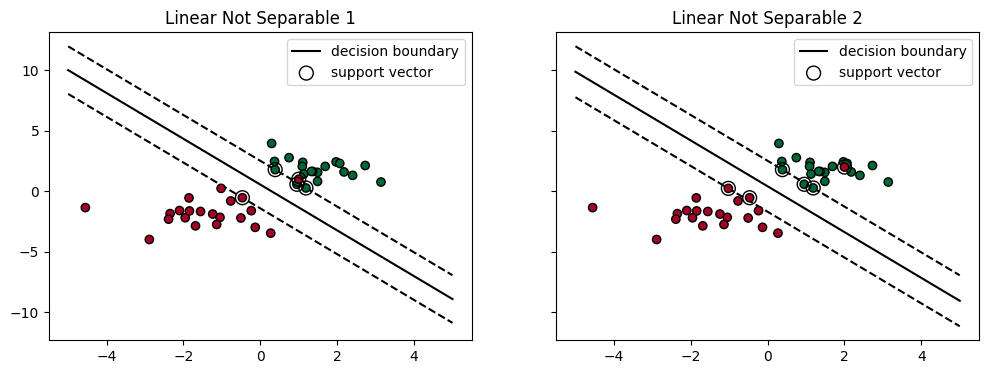

In [4]:
# Two types of misclassfication
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4),sharey=True)

# fit svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_new, Y_new)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax1.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax1.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
# plot support vector
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')
ax1.set_title('Linear Not Separable 1')

ax1.legend()

# fit svm
clf2 = svm.SVC(kernel='linear', C=1)
clf2.fit(X_new2, Y_new2)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax2.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax2.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
# plot support vector
ax2.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')

ax2.set_title('Linear Not Separable 2')

ax2.legend()

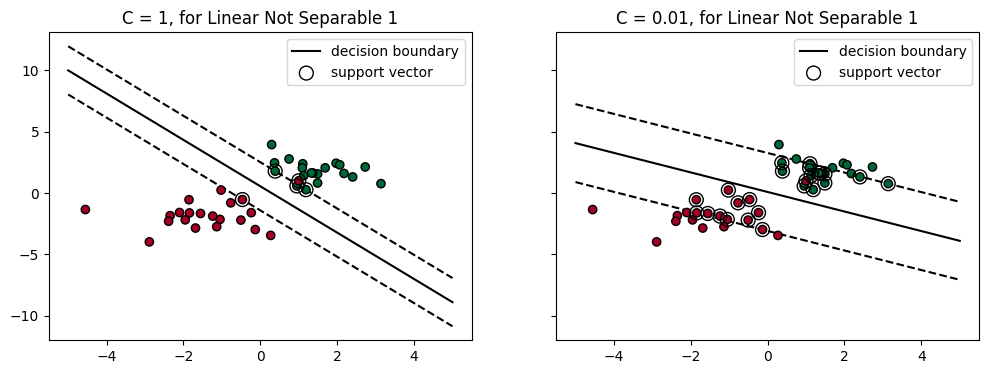

In [5]:
# Illustrate Degree of tolerance 
# penalty term - C in linear SVM
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4),sharey=True)

# fit svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_new, Y_new)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax1.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax1.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
# plot support vector
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')
ax1.set_title('C = 1, for Linear Not Separable 1')

ax1.legend()

# fit svm
clf2 = svm.SVC(kernel='linear', C=0.01)
clf2.fit(X_new, Y_new)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax2.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
# plot support vector
ax2.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')

ax2.set_title('C = 0.01, for Linear Not Separable 1')

ax2.legend()

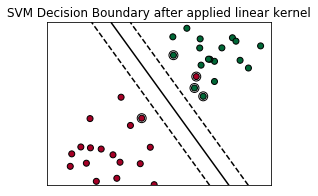

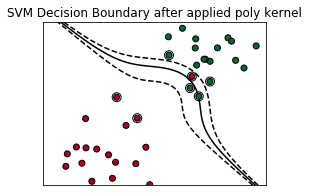

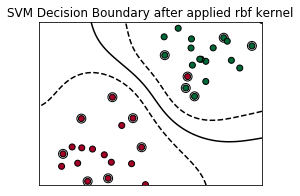

In [6]:
# Demonstrating Linear, Ploy, RBF, kernel
# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X_new, Y_new)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
#     plt.pcolormesh(XX, YY, Z > 0, cmap='RdYlGn')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
#     ('f model: T=%i' %t)
    plt.title('SVM Decision Boundary after applied %s kernel' %kernel)
    fignum = fignum + 1
plt.show()

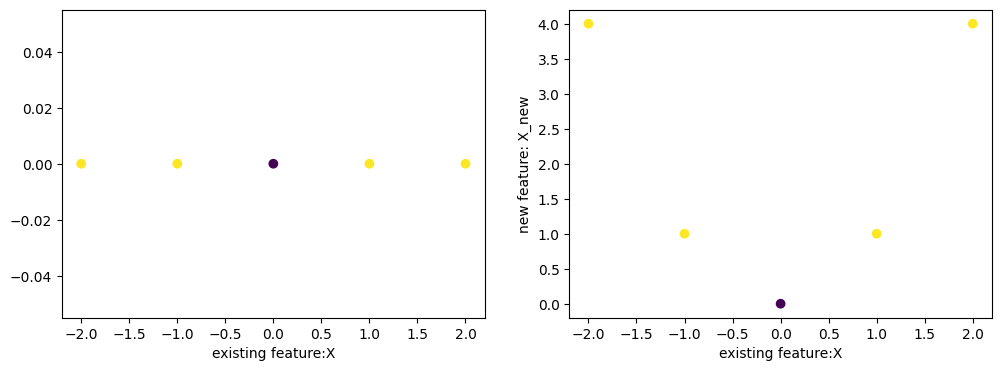

In [6]:
# Illustrate polynominal
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

X = np.array([-2,-1,0, 1,2])
Y = np.array([1,1,0,1,1])
ax1.scatter(X, np.zeros_like(X), c=Y)
ax1.set_xlabel('existing feature:X')

X2 = np.power(np.array([-2,-1,0, 1,2]),2)
ax2.scatter(X,X2,c=Y)
ax2.set_xlabel('existing feature:X')
ax2.set_ylabel('new feature: X_new')
plt.show()



In [7]:
# illustrate rfb

$$\phi (x,center) = exp{(-\gamma \left \| x - center \right \|^{2})}$$


In [8]:
X_C1 = np.array([-2,-1,0, 1,2]) - (-1)
X_C1_t = np.exp(np.power(-(0.1*X_C1),2))

In [9]:
X_C1_t

array([1.01005017, 1.        , 1.01005017, 1.04081077, 1.09417428])

In [10]:
X_C2 = np.array([-2,-1,0, 1,2]) - (1)
X_C2_t = np.exp(np.power(-(0.1*X_C2),2))
X_C2_t

array([1.09417428, 1.04081077, 1.01005017, 1.        , 1.01005017])

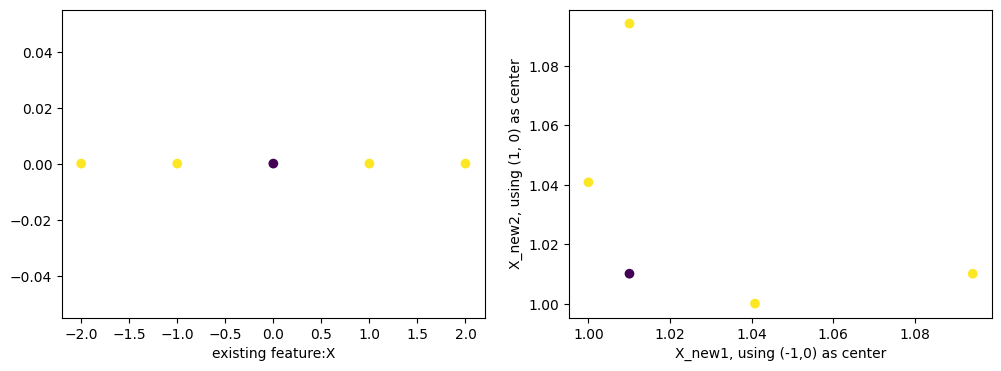

In [11]:
# Illustrate rbf
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

X = np.array([-2,-1,0, 1,2])
Y = np.array([1,1,0,1,1])
ax1.scatter(X, np.zeros_like(X), c=Y)
ax1.set_xlabel('existing feature:X')


ax2.scatter(X_C1_t,X_C2_t,c=Y)
ax2.set_xlabel('X_new1, using (-1,0) as center')
ax2.set_ylabel('X_new2, using (1, 0) as center')
plt.show()


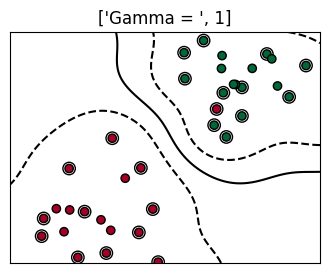

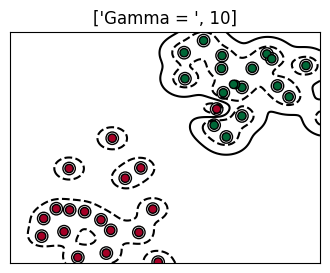

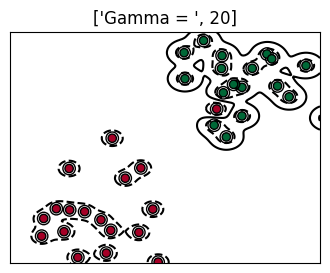

In [12]:
# Demonstrating Gamma Tunning
# figure number
fignum = 1

# fit the model
for gamma in [1,10,20]:
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_new, Y_new)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
#     plt.pcolormesh(XX, YY, Z > 0, cmap='RdYlGn')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title(['Gamma = ', gamma])
    fignum = fignum + 1
plt.show()